In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [2]:
AAA = eclipse_DVH('Case10_AAA.txt')
AXB = eclipse_DVH('Case10_Dm.txt')

Case10_AAA.txt loaded 	 patID = Case10_AAA	 Prescription [Gy] = 65.010
Case10_Dm.txt loaded 	 patID = Case10_Dm	 Prescription [Gy] = 65.010


In [3]:
AXB.DVH_df.columns

Index(['CTV65_P8', 'CTV60_P1', 'CTV54_P5', 'Spinal Cord_P9', 'L Lens_P9',
       'R Lens_P9', 'L Optic Nerve_P6', 'R Optic Nerve_P6', 'L Parotid_P9',
       'R Parotid_P9', 'Optic Chiasm_P5', 'L Orbit_P9', 'R Orbit_P9',
       'Brain Stem_P9', 'BS + 3mm_P7', 'BS + 5mm_P8', 'Body_P9',
       'Lt Par edit_P9', 'PTV1_P9', 'PTV1 edit_P9', 'PTV2_P9', 'PTV2 edit_P9',
       'PTV3_P', 'PTV3 edit_P', 'Pseudo Midline_9', 'Pseudo Oral Cav9',
       'Pseudo Other_P7', 'Pseudo Post_P8', 'Rt Par edit_P9', 'SC + 3mm_P9',
       'SC + 5mm_P9', 'Pseudo PTV1_P9', 'Pseudo PTV2_P9', 'Pseudo PTV3_P',
       'schotspot_P', 'L Parotid hot_P', 'Pseudo 65 boost_',
       'Pseudo 60 boost_'],
      dtype='object')

(55, 75)

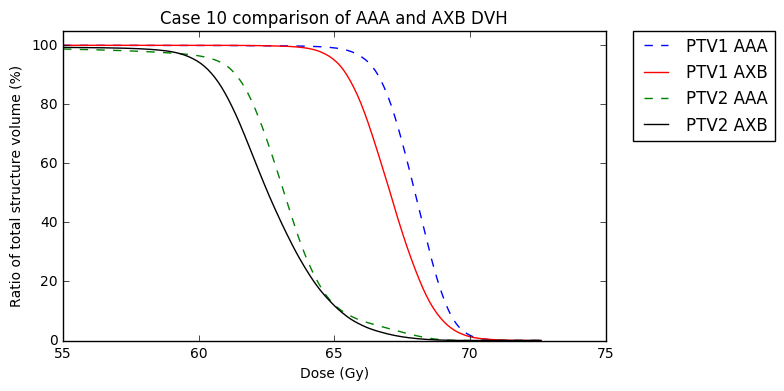

In [5]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'PTV1_P9'
plt.plot(AAA.DVH_df[structure], label="PTV1 AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV1 AXB",  color='r' )

structure = 'PTV2_P9'
plt.plot(AAA.DVH_df[structure], label="PTV2 AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV2 AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 10 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([55,75])

In [6]:
Comparison_df = pd.concat([ AAA.metrics_df['PTV1_P9'], 
                            AXB.metrics_df['PTV1_P9'], 
                           
                           AAA.metrics_df['PTV2_P9'], 
                           AXB.metrics_df['PTV2_P9']], 
                           axis=1)
Comparison_df

,PTV1_P9,PTV1_P9,PTV2_P9,PTV2_P9
Metric,,,,
Structure,PTV1_P9,PTV1_P9,PTV2_P9,PTV2_P9
Approval Status,Unapproved,Unapproved,Unapproved,Unapproved
Plan,Case10_AAA,Case10_Dm,Case10_AAA,Case10_Dm
Course,1,1,1,1
Volume [cmÂ³],115.1,115.1,483.4,483.4
Dose Cover.[%],100.0,100.0,100.0,100.0
Sampling Cover.[%],100.0,100.0,100.0,100.0
Min Dose [%],65.8,72.0,0.0,0.0
Max Dose [%],112.1,111.8,108.0,108.5
